In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problema 1

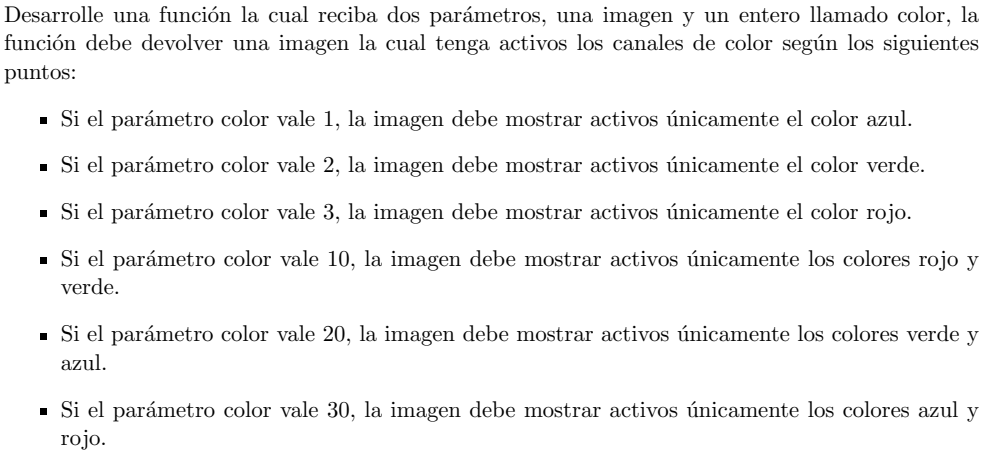

In [4]:
imagen = cv2.imread("Guipil.jpeg")

In [16]:
def canal_color(imagen, color):
    if color not in [1, 2, 3, 10, 20, 30]:
        raise ValueError("El parámetro 'color' debe ser 1, 2, 3, 10, 20 o 30.")
    
    # Convertir imagen a RGB (cv2 lee las imágenes en BGR por defecto)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    
    # Obtener los canales de color
    r, g, b = cv2.split(imagen_rgb)

    # Inicializar matriz de ceros para cada canal
    cero_canal = np.zeros_like(r)

    if color == 1:
        imagen_procesada = cv2.merge([cero_canal, cero_canal, b])
    elif color == 2:
        imagen_procesada = cv2.merge([cero_canal, g, cero_canal])
    elif color == 3:
        imagen_procesada = cv2.merge([r, cero_canal, cero_canal])
    elif color == 10:
        imagen_procesada = cv2.merge([r, g, cero_canal])
    elif color == 20:
        imagen_procesada = cv2.merge([cero_canal, g, b])
    elif color == 30:
        imagen_procesada = cv2.merge([r, cero_canal, b])

    return imagen_procesada

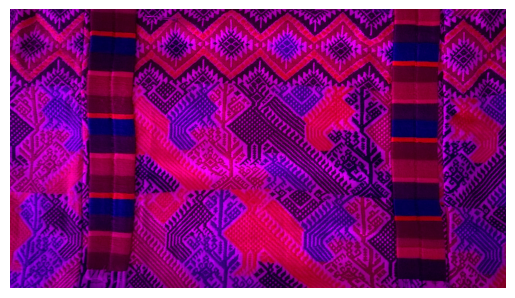

In [17]:
imagen_procesada = canal_color(imagen, 30)
plt.imshow(imagen_procesada)
plt.axis('off')
plt.show()

### Problema 2

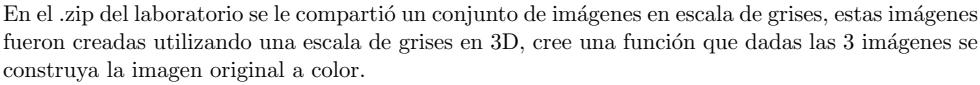

In [4]:
import numpy as np
import cv2

def construir_imagen_color(img_rojo, img_verde, img_azul):
    # Agregar una dimensión extra para el canal de color a cada imagen en escala de grises
    img_rojo = img_rojo[:, :, np.newaxis]
    img_verde = img_verde[:, :, np.newaxis]
    img_azul = img_azul[:, :, np.newaxis]

    # Apilamos las imágenes a BGR (azul, verde, rojo)
    imagen_color = np.concatenate((img_azul, img_verde, img_rojo), axis=2)

    return imagen_color

imagen_rojo = cv2.imread("imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imagen_verde = cv2.imread("imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imagen_azul = cv2.imread("imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

imagen_color = construir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

# Mostrar la imagen
cv2.imshow("Imagen a color", imagen_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Problema 3

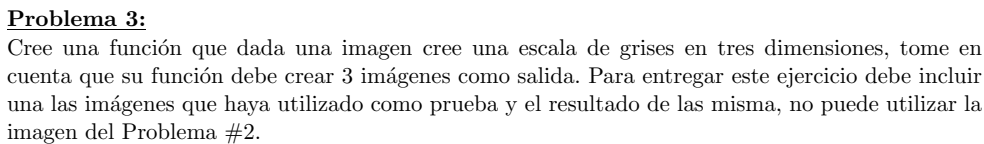

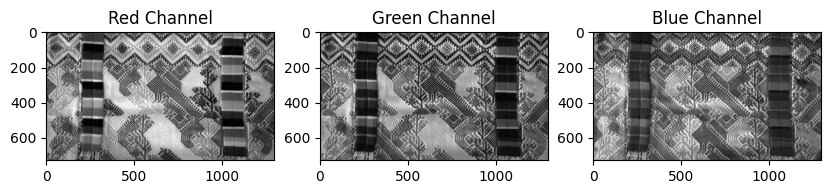

In [8]:
img = cv2.imread("Guipil.jpeg")

alto, ancho, _ = img.shape

# Creamos arrays vacíos para los canales
gris_rojo = np.zeros((alto, ancho), dtype=np.uint8)
gris_verde = np.zeros((alto, ancho), dtype=np.uint8)
gris_azul = np.zeros((alto, ancho), dtype=np.uint8)

# Analizando pixel por pixel
for i in range(alto):
    for j in range(ancho):
        pixel = img[i, j]
        blue = pixel[0]  # Orden BGR según OpenCV
        green = pixel[1]
        red = pixel[2]

        # Creamos imagenes pixel por pixel
        gris_rojo[i, j] = red
        gris_verde[i, j] = green
        gris_azul[i, j] = blue

# Display the grayscale images for each color channel
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(gris_rojo, cmap='gray')
plt.title('Red Channel')
plt.subplot(132)
plt.imshow(gris_verde, cmap='gray')
plt.title('Green Channel')
plt.subplot(133)
plt.imshow(gris_azul, cmap='gray')
plt.title('Blue Channel')
plt.show()


### Problema 4

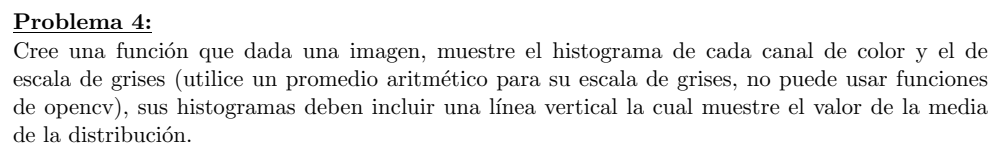

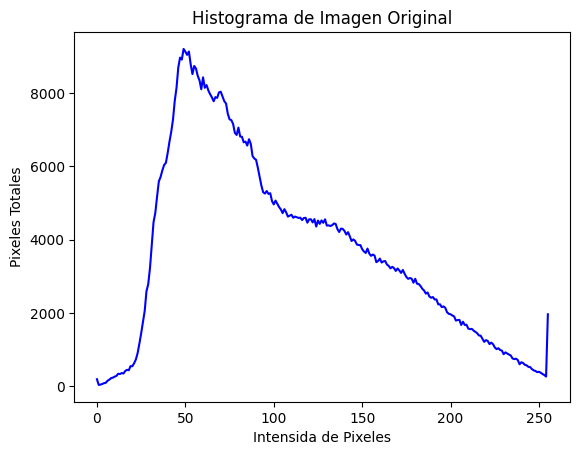

In [4]:
img = cv2.imread('Guipil.jpeg', cv2.COLOR_BGR2RGB)
hist1 = cv2.calcHist([img],[0], None, [256],[0,256])
plt.plot(hist1, color = "blue")
plt.xlabel("Intensida de Pixeles")
plt.ylabel("Pixeles Totales")
plt.title("Histograma de Imagen Original")
plt.show()

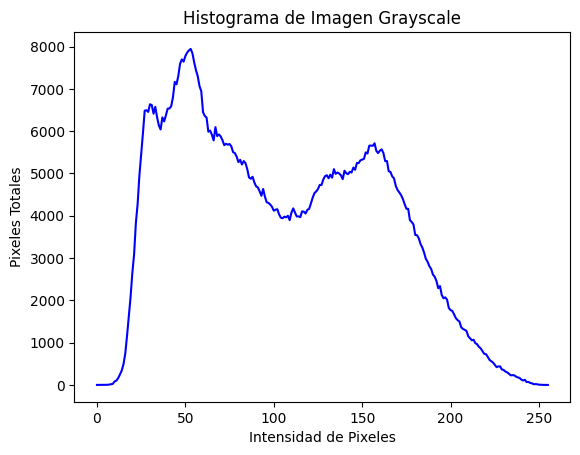

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the dimensions of the image
alto, ancho, _ = img.shape

# Create empty array for the grayscale image
gris = np.zeros((alto, ancho), dtype=np.uint8)

# Convert the colored image to grayscale
for i in range(alto):
    for j in range(ancho):
        pixel = img[i, j]
        blue = pixel[0]  # Note: BGR channel order in OpenCV
        green = pixel[1]
        red = pixel[2]

        # Convert the pixel to grayscale using the weighted sum method
        gray_value = int(0.29 * red + 0.59 * green + 0.114 * blue)
        gris[i, j] = gray_value

# Calculate the histogram of the grayscale image
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])
cv2.imwrite("gris_ponderado.jpg",gris)

# Plot the histogram
plt.plot(hist, color="blue")
plt.xlabel("Intensidad de Pixeles")
plt.ylabel("Pixeles Totales")
plt.title("Histograma de Imagen Grayscale")
plt.show()


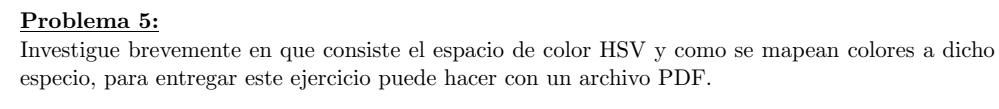

El espacio de color HSV (Hue, Saturation, Value) es un modelo que se utiliza para describir y representar colores en términos de tres componentes principales: matiz, saturación y valor.

1. Matiz (Hue): Es el componente que define el tipo de color, como el rojo, verde, azul, etc. Se mide en grados y forma un círculo de 360°, donde los extremos 0° y 360° representan el mismo color (rojo). Los valores intermedios entre 0° y 360° representan otros colores en el espectro.

2. Saturación (Saturation): Representa la intensidad o pureza del color. Un valor alto de saturación indica colores más vivos y brillantes, mientras que un valor bajo tiende hacia el gris y, eventualmente, al blanco o negro, dependiendo del valor de luminosidad.

3. Valor (Value): Se refiere a la luminosidad o brillo del color. Un valor alto significa un color más claro, mientras que un valor bajo indica un color más oscuro.

Para mapear colores a este espacio, generalmente se realiza una conversión desde el espacio de color RGB al espacio de color HSV. Las fórmulas matemáticas para esta conversión pueden variar según la implementación, pero generalmente son:

- Matiz (H): Los valores de RGB en el rango de 0 a 255, se divide cada componente entre 255 para normalizarlos y luego aplicamos la fórmula para obtener el valor del matiz.

- Saturación (S): Se calcula comparando el valor máximo y el valor mínimo entre los componentes RGB normalizados. Representa la intensidad del color y se expresa como un porcentaje.

- Valor (V): Representa la luminosidad del color y se calcula como el valor máximo entre los componentes RGB normalizados.

Después de realizar la conversión, los colores estarán representados en el espacio de color HSV, lo que facilita la manipulación y el ajuste de diferentes características de color.

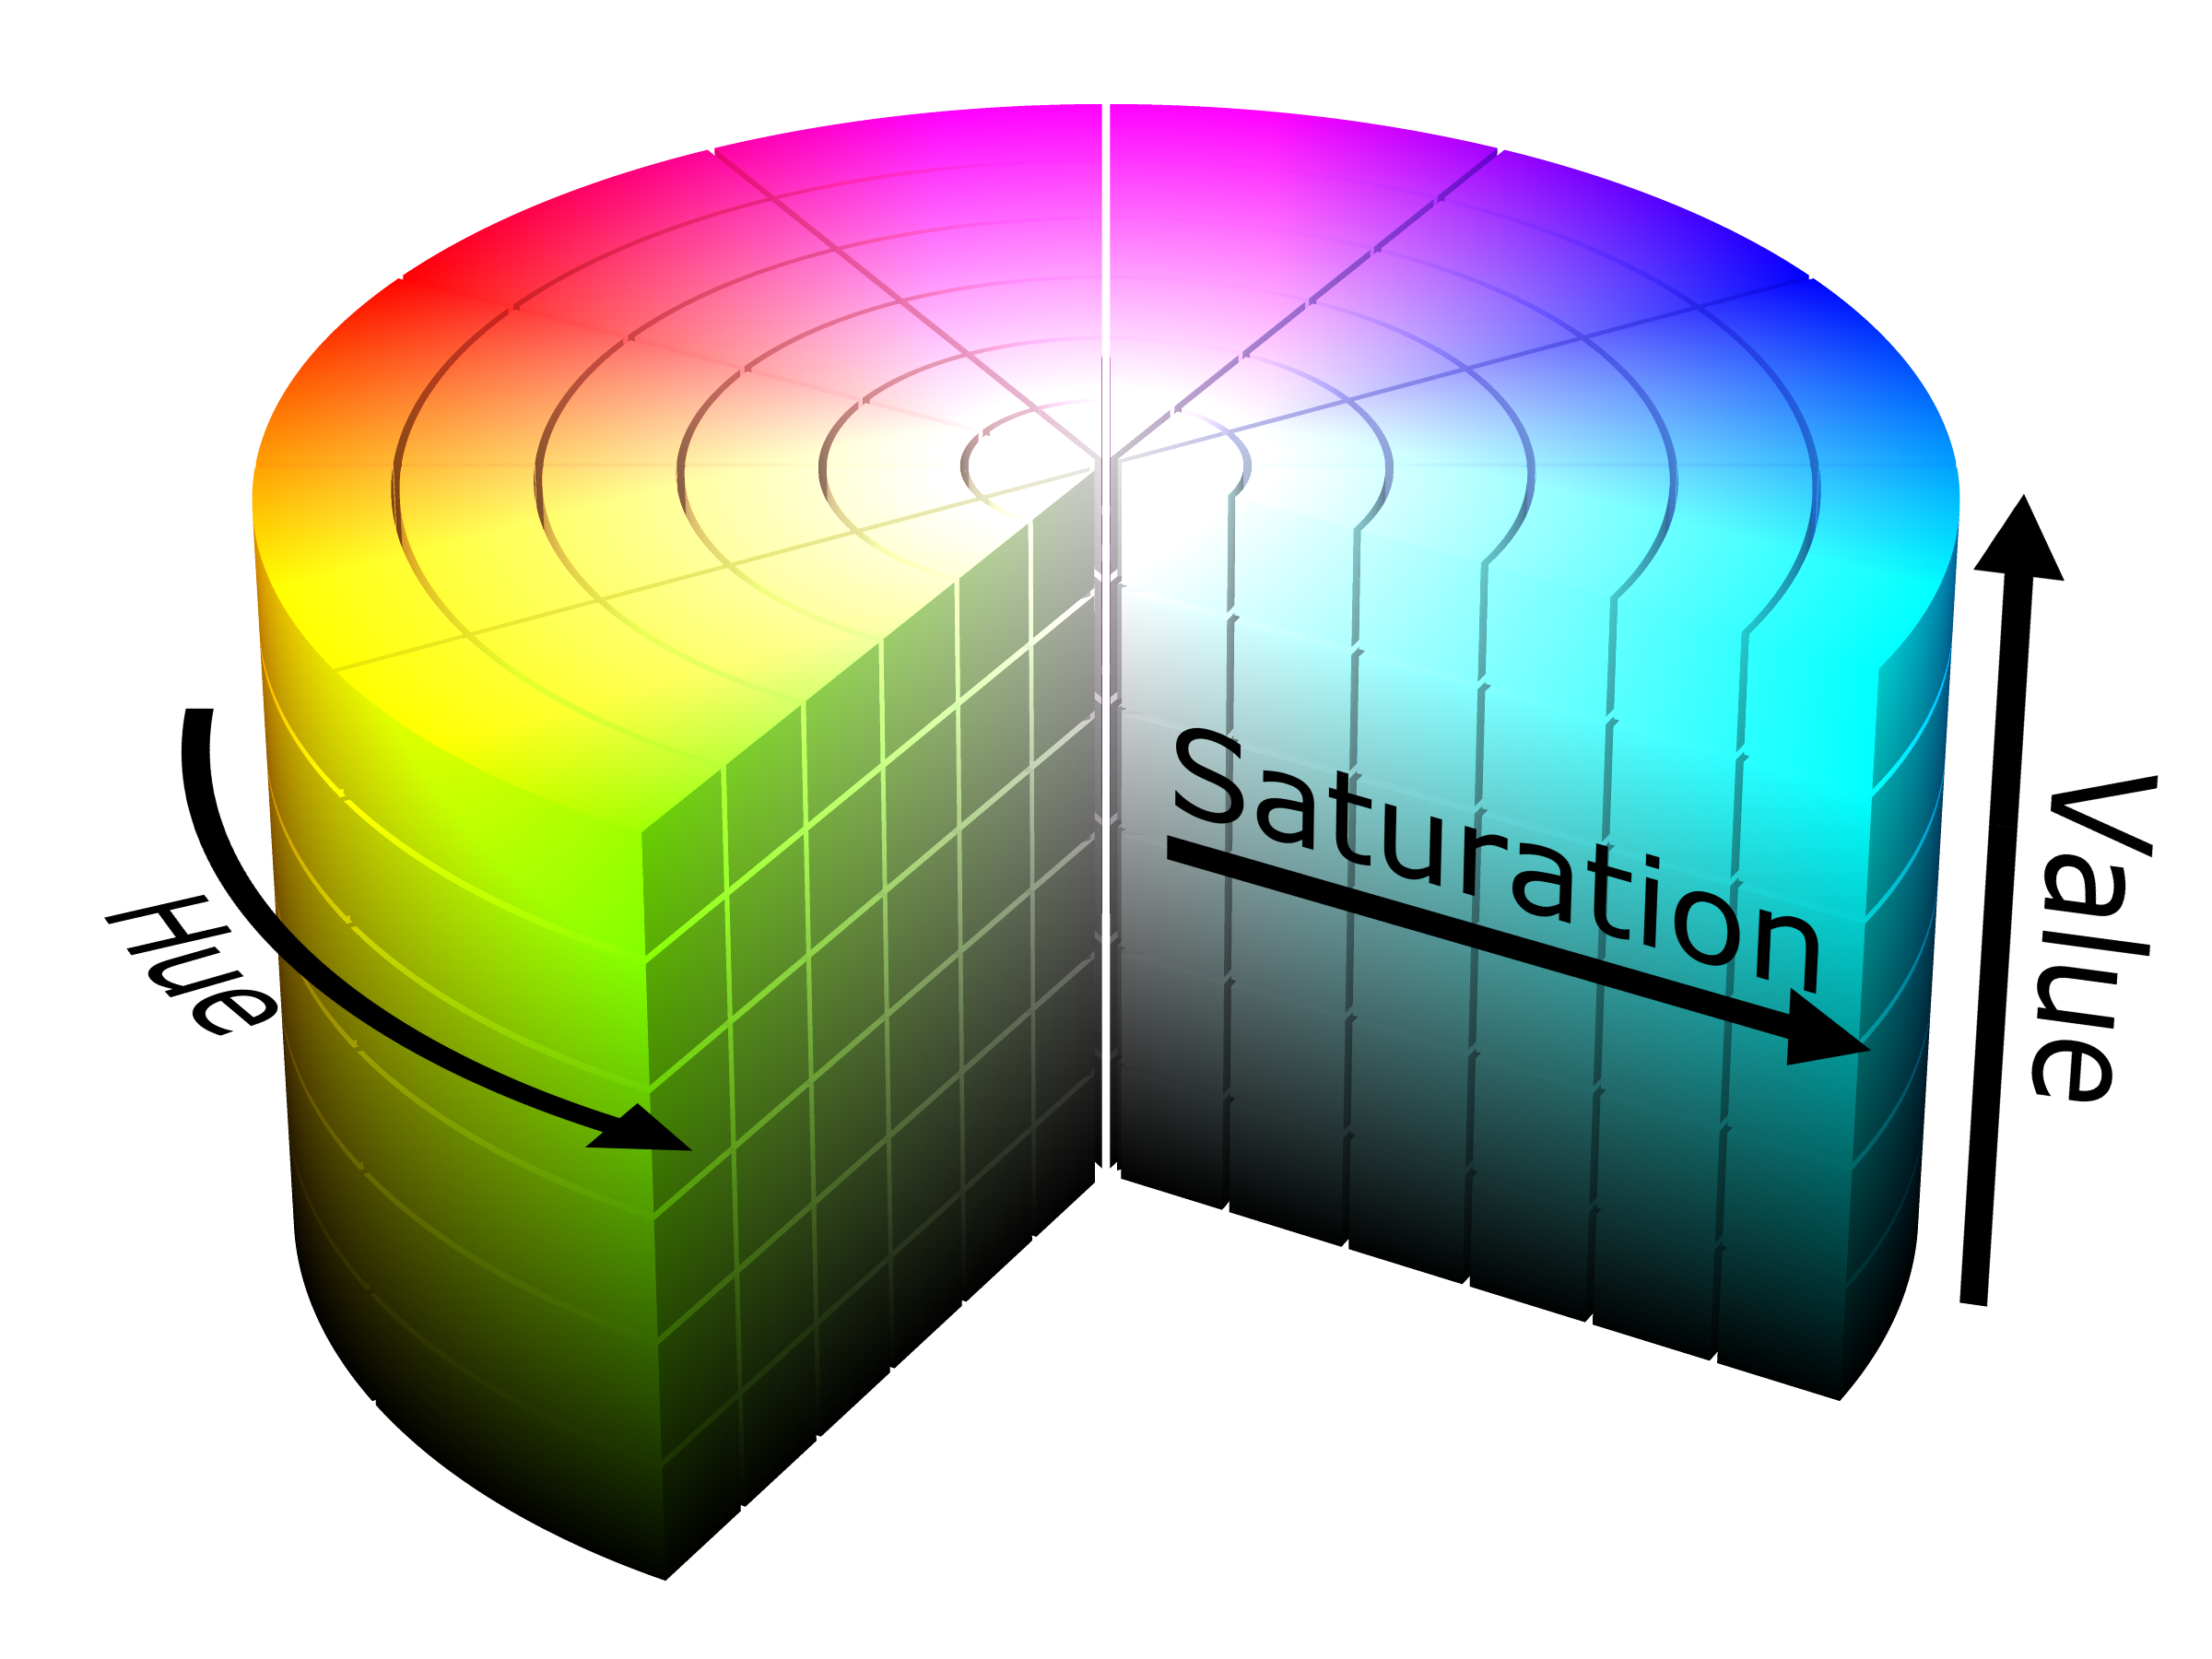